In [29]:
#Importing the dependencies
import cvlib
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
##Function to draw rectangle over detected face
def show_detection(image,rects,confidences):
    for (startx,starty,endx,endy) in rects:
        for confidence in confidences:
            y = starty+5 if starty < 10 else starty-10
            cv2.rectangle(image,(startx,starty),(endx,endy),(255,0,0),5)
            cv2.putText(image,f'{confidence:.3f}%',(startx,y),cv2.FONT_HERSHEY_SIMPLEX,3,(255,255,0),2)
    return image

In [ ]:
##Function to display images
def show_with_matplotlib(image,title):
    image = image[:,:,::-1]
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

## Face detected in image

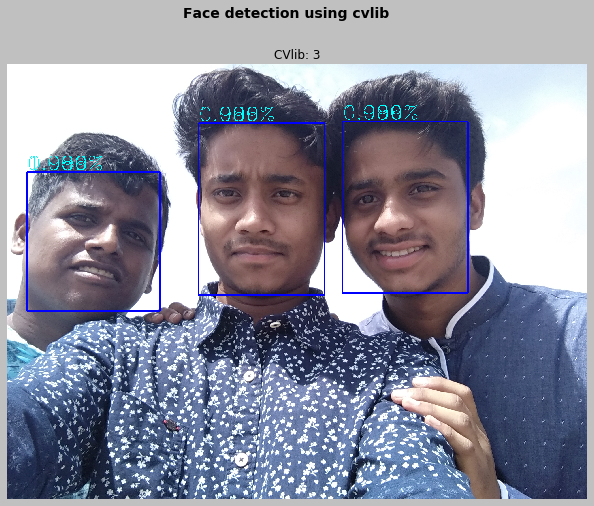

In [65]:
##Loading the image
image = cv2.imread('faces.jpg')

##detecting faces in an image
rects,confidence = cvlib.detect_face(image,0.7)

##Drawing bounding box + confidence on the faces detected
faces= show_detection(image.copy(),rects,confidence)


##Showing the faces detected
fig = plt.figure(figsize=(12,8))
plt.suptitle('Face detection using cvlib',fontsize=14,fontweight='bold')
fig.patch.set_facecolor('silver')
show_with_matplotlib(faces,'CVlib: '+str(len(rects)))
plt.show()

## Face detection in videos

In [71]:
cam = cv2.VideoCapture(0)
cam.set(3,640) # set Width
cam.set(4,480) #set height
        
while True:
        ret,frame = cam.read()
        
        if not ret:
            break
        rects,confidences = cvlib.detect_face(frame,0.7)
        show_detections_video(frame,rects,confidences)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
cam.release()
cv2.destroyAllWindows()

In [68]:
def show_detections_video(image,rects,confidences):
     for (startx,starty,endx,endy) in rects:
        for confidence in confidences:
            y = starty+5 if starty < 10 else starty-10
            cv2.rectangle(image,(startx,starty),(endx,endy),(255,0,0),5)
            cv2.putText(image,f'{confidence:.3f}%',(startx,y),cv2.FONT_HERSHEY_SIMPLEX,3,(255,255,0),2)
     cv2.imshow('Frame',image)   